In [1]:
%matplotlib inline

# Yellowbrick Text Examples 

This notebook is a sample of the text visualizations that yellowbrick provides

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

## add this back in when no longer testing FreqDist in the ipynb
# import yellowbrick as yb 
import matplotlib.pyplot as plt 

## Load Text Corpus for Example Code

Yellowbrick has provided a text corpus wrangled from the [Baleen RSS Corpus](http://baleen.districtdatalabs.com/) to present the following examples. If you haven't downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the text notebook. Note that this will create a directory called `data` that contains subdirectories with the provided datasets. 

In [3]:
from download import download_all 
from sklearn.datasets.base import Bunch

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

In [4]:
data = load_data('hobbies') 

In [5]:
data['categories']

['books', 'cinema', 'cooking', 'gaming', 'sports']

In [6]:
cats = {}

for category in data['categories']:
    texts = []
    for idx in range(len(data['data'])):
        if data['target'][idx] == category:
            texts.append(data['data'][idx])
    cats[category] = texts

In [7]:
# with Yellowbrick
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text.freqdist import * 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
def count_vect(texts):
    # countvectorize the texts
    # return the features (words) and their counts 
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(text for text in texts)
    features = count_vect.get_feature_names()
    counts   = np.asarray(X_train_counts.sum(axis=0)).ravel().tolist()
    return (features, counts)
    
def freq_dist(features, counts):
    # Get the word frequencies
    word_freq = list(zip(features, counts))
    return word_freq

def get_counts(word_freq):
    sorted_word_freq = sorted(word_freq, key=itemgetter(1), reverse=True)
    words, counts = list(zip(*sorted_word_freq))
    return (words, counts)

def draw(words, counts, category=None, N=50):
    # Plot the top 50 most frequent words
    # TODO: convert to draw
    y_pos = np.arange(N)
    plt.bar(y_pos, counts[:N], align='center', alpha=0.5)
    plt.xticks(y_pos, words[:N], rotation='vertical')
    
    # TODO: convert to finalize
    if category is None:
        plt.title("Most frequent terms")
    else:
        plt.title("Most frequent terms from {}".format(category))
    plt.show()

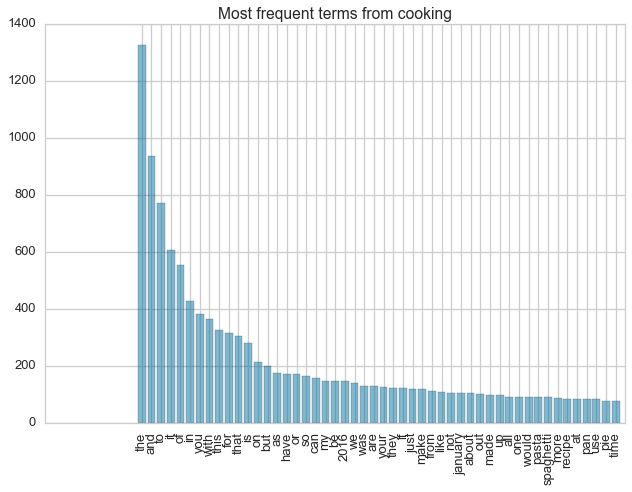

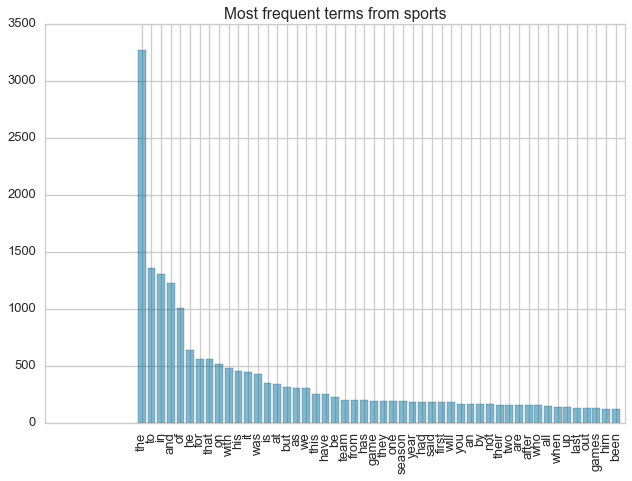

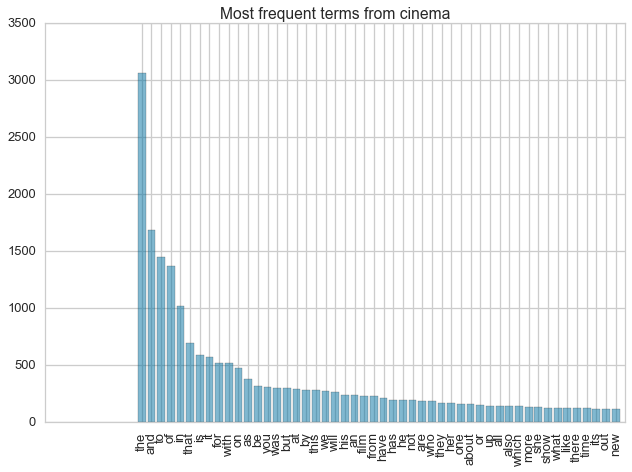

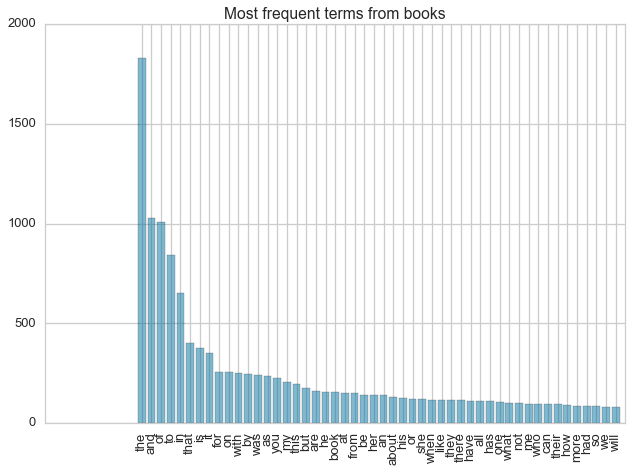

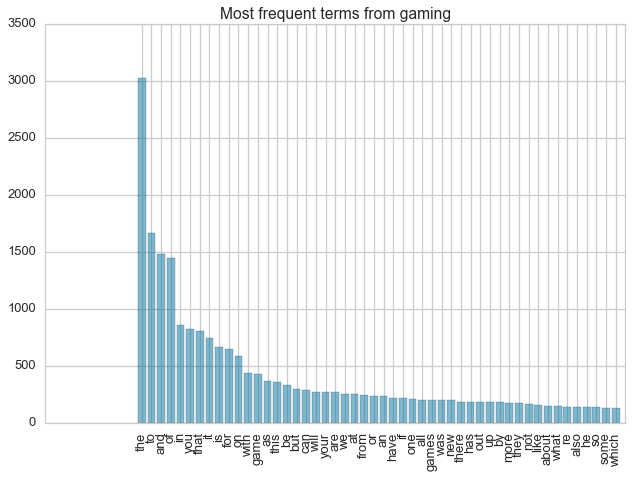

In [12]:
for category, texts in cats.items():
    features, counts = count_vect(texts)
    words, counts = get_counts(freq_dist(features, counts))
    draw(words, counts, category)

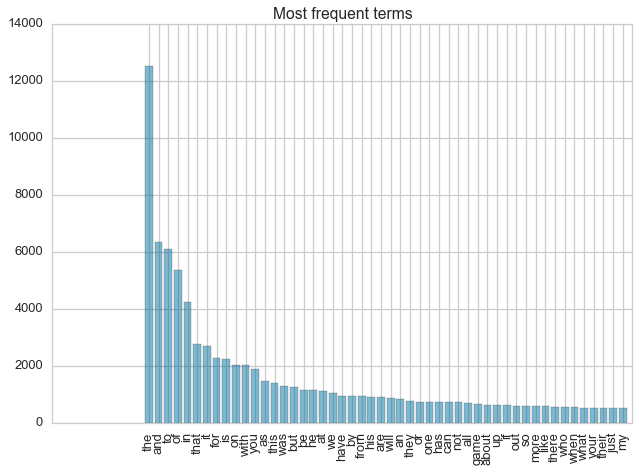

In [13]:
texts = [text for text in data['data']]
features, counts = count_vect(texts)
words, counts = get_counts(freq_dist(features, counts))
draw(words, counts)

In [ ]:
class FreqDist(TextVisualizer):
    """
    A frequency distribution tells us the frequency of each vocabulary
    item in the text. In general, it could count any kind of observable
    event. It is a distribution because it tells us how the total
    number of word tokens in the text are distributed across the
    vocabulary items.
    """
    def __init__(self, ax=None, color=None, features=None,
                 counts=None, category=None, cumulative=False, 
                 N=50, **kwargs):
        """
        Initialize the base frequency distributions with many of the options
        required in order to make the visualization work.

        Parameters
        ----------

        :param ax: the axis to plot the figure on.

        :param color: optional list or tuple of colors

        :param features: list
            list of words
            
        :param counts: list
            list of counts of each word
        
        :param category: string or None
            If string, one of categories from possible class labels
        
        :param cumulative: Boolean
            If True, plots the cumulative frequency distribution

        :param N: integer
            Top N tokens to be plotted.

        :param kwargs: dictionary
            Keyword arguments passed to the super class.

        These parameters can be influenced later on in the visualization
        process, but can and should be set as early as possible.
        """
        super(FreqDist, self).__init__(
            ax, color, features, counts, category, 
            cumulative, N, **kwargs
        )

    def freq_dist(self):
        # Get the word frequencies
        self.word_freq = list(zip(self.features, self.counts))
#         return word_freq

    def get_counts(self):
        # take freq_dist as input
        # Output self.X and self.y
        # self.X are the features (e.g. words)
        # self.y are the occurrence counts of each feature
        sorted_word_freq = sorted(self.word_freq, 
                                  key=itemgetter(1), reverse=True)
        self.X, self.y = list(zip(*sorted_word_freq))
#         return (words, counts)

    def fit(self):
        self.get_counts(self.freq_dist())
        self.draw(self.words, self.counts)
    
    def draw(self, X, y, **kwargs):
        """
        Called from the fit method, this method creates the canvas and
        draws the distribution plot on it.
        """
        # X are the features (e.g. words)
        # y are the occurrence counts of each feature
        # Plot the top 50 most frequent words
        y_pos = np.arange(self.N)
        plt.bar(y_pos, self.y[:self.N], align='center', alpha=0.5)
        plt.xticks(y_pos, self.X[:self.N], rotation='vertical')    

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        The user calls poof and poof calls finalize.

        Parameters
        ----------
        kwargs: generic keyword arguments.

        """
        # Set the title
        self.set_title(
            'Frequency distribution for top {} tokens'.format(self.N)
        )

        # Set the legend and the grid
        self.ax.legend(loc='best')
        self.ax.grid()


In [ ]:
def count_vect(texts):
    # countvectorize the texts
    # return the features (words) and their counts 
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(text for text in texts)
    features = count_vect.get_feature_names()
    counts   = np.asarray(X_train_counts.sum(axis=0)).ravel().tolist()
    return (features, counts)

In [ ]:
for category, texts in cats.items():
    features, counts = count_vect(texts)

In [ ]:
visualizer = FreqDist(features=features, counts=counts)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()   